In [2]:
import pandas as pd
from src.data import impex_reader

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
def describe(df):
    print(df.dtypes,'\n')
    print('Users: ', len(df['user'].unique()))
    print('Orders: ', len(df['order'].unique()))
    print('Products: ', len(df['product'].unique()))
    print('Order Entries: ', len(df))
    print('Earliest date: ', min(df['creationtime']), ' latest date: ',  max(df['creationtime']),'\n')

In [9]:
vx_df = impex_reader.read_raw_vx()

C:\Users\mullmann\.conda\envs\recosys\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (13,16,19,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
D:\dev\marco\masterthesis\recosys\src\data\impex_reader.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  orderentry['order'] = orderentry['order'].str.replace('\W', '')


In [4]:
koch_df = impex_reader.read_raw_koch()

C:\Users\mullmann\.conda\envs\recosys\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (9,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


TypeError: bad operand type for unary ~: 'str'

In [7]:
koch_df = koch_df[~(koch_df['user']=='erp')]

In [10]:
vx_df[vx_df['user']=='oldboy8@wp.pl']

,order,creationtime,product,quantity,totalPrice,user
804254,STG30039569,2021-10-03 12:33:13,VxMasterProductCatalog:Online:6.7803,5,23.0,oldboy8@wp.pl


In [11]:
vx_df[vx_df['order']=='26579230']

,order,creationtime,product,quantity,totalPrice,user
804955,26579230,2020-01-11 09:21:50,VxMasterProductCatalog:Online:0.9415.M26,1,96.03,mw@toposweb.net
804956,26579230,2020-01-11 09:35:27,VxMasterProductCatalog:Online:40051,1,0.00,mw@toposweb.net
804957,26579230,2020-01-11 09:35:27,VxMasterProductCatalog:Online:40051,1,0.00,mw@toposweb.net


In [12]:
print('Koch:')
describe(koch_df)
print('Victorinox:')
describe(vx_df)

Koch:
order                   string
creationtime    datetime64[ns]
product                 string
quantity                 int64
totalPrice             float64
user                    string
dtype: object 

Users:  10389
Orders:  489986
Products:  33621
Order Entries:  2392243
Earliest date:  2018-01-02 08:32:08  latest date:  2020-12-10 06:05:46 

Victorinox:
order                   object
creationtime    datetime64[ns]
product                 string
quantity                 int64
totalPrice             float64
user                    object
dtype: object 

Users:  455497
Orders:  494559
Products:  6134
Order Entries:  805020
Earliest date:  2015-01-06 01:17:03  latest date:  2021-12-01 12:58:40 



In [13]:
koch_df.rename(columns={"creationtime":"time","product":"item"}, inplace=True)
koch_df['label'] = 2
vx_df.rename(columns={"creationtime":"time","product":"item"}, inplace=True)
vx_df['label'] = 2

koch_df = koch_df[['user','item','label','time']]
vx_df = vx_df[['user','item','label','time']]

koch_df.dropna(axis='index', how='any', inplace=True)
vx_df.dropna(axis='index', how='any', inplace=True)

impex_reader.write_to_curated(koch_df, "koch")
impex_reader.write_to_curated(vx_df, "vx")

In [30]:
impex_reader.process_retail_rocket()
impex_reader.process_youchoose()

In [7]:
impex_reader.process_youchoose()

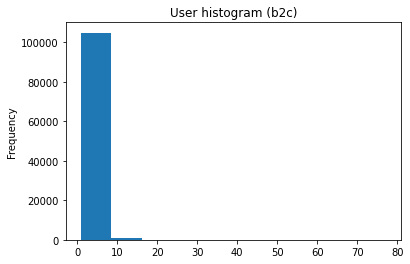

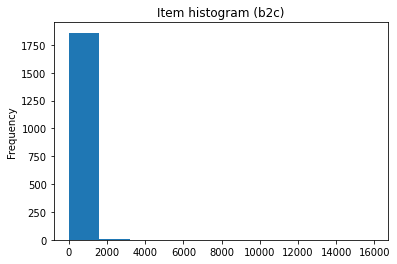

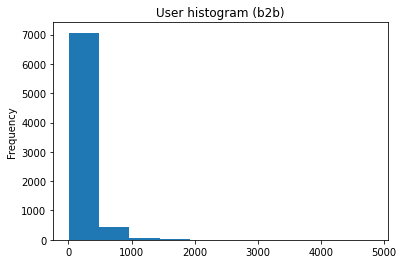

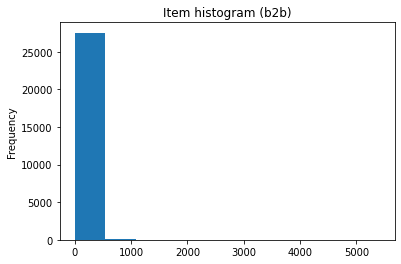

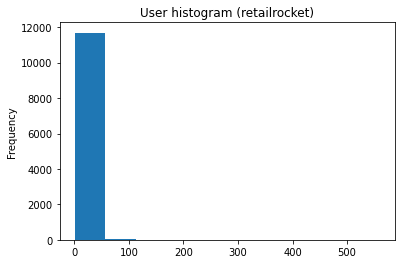

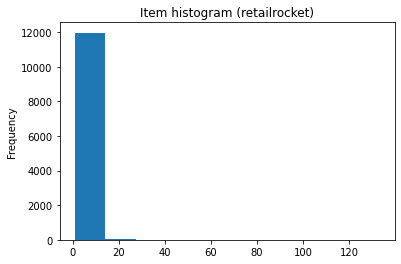

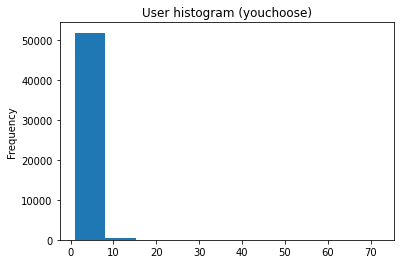

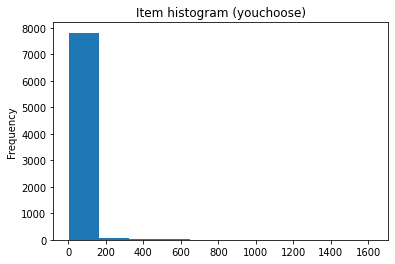

In [98]:
print_hist(pd.read_csv("../data/curated/vx/orderentry.csv", parse_dates=['time'], header=None, names=['user','item', 'time']), 'b2c')
print_hist(pd.read_csv("../data/curated/koch/orderentry.csv", parse_dates=['time'], header=None, names=['user','item', 'time']), 'b2b')
print_hist(pd.read_csv("../data/curated/retailrocket.csv", parse_dates=['time'], header=None, names=['user','item', 'time']), 'retailrocket')
print_hist(pd.read_csv("../data/curated/youchoose.csv", parse_dates=['time'], header=None, names=['user','item', 'time']), 'youchoose')

In [97]:
def print_hist(df, datasource):
    df['user'] = df['user'].astype('category')
    df['item'] = df['item'].astype('category')
    user_df = df.groupby('user').agg(count=pd.NamedAgg(column="time", aggfunc="count")).sort_values('count', ascending=False).reset_index()
    item_df = df.groupby('item').agg(count=pd.NamedAgg(column="time", aggfunc="count")).sort_values('count', ascending=False).reset_index()
    user_df.plot(kind='hist', title='User histogram (' + datasource + ')', legend=False)
    item_df.plot(kind='hist', title='Item histogram (' + datasource + ')', legend=False)

